In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
#import seaborn as sn
from sklearn.model_selection import train_test_split

from random import seed
seed(1)


import tensorflow as tf
from tensorflow import keras
print("Tensorflow Version: ", tf.__version__)


kaggle = 0 # Kaggle active 1

if kaggle == 1 :
    MNIST_PATH= '../input/digit-recognizer'
else:
    MNIST_PATH= '../Digit_Recognition_with_a_Deep_Neural_Network/data/input/digit-recognizer'



import os
for dirname, _, filenames in os.walk(MNIST_PATH): 
    for filename in filenames:
        print(os.path.join(dirname, filename))
        

Tensorflow Version:  2.3.0
../Digit_Recognition_with_a_Deep_Neural_Network/data/input/digit-recognizer\sample_submission.csv
../Digit_Recognition_with_a_Deep_Neural_Network/data/input/digit-recognizer\test.csv
../Digit_Recognition_with_a_Deep_Neural_Network/data/input/digit-recognizer\train.csv


# Introduction - MNIST Training Competition
Link to the topic: https://www.kaggle.com/c/digit-recognizer/data

This is another Notebook to take a look into annother algorithm. Here I want to give the Deep Neural Network with the Framework Keras a try. As already mentioned in other notebooks, I will skip some explanations about the data set here. Moreover I will use the already discovered knowledge about the data and transform/prepare the data rightaway.

If you are interested in some more clearly analysis of the dataset take a look into my other notebooks about the MNIS-dataset:
- Another MNIST Try: https://www.kaggle.com/skiplik/another-mnist-try
- First NN by Detecting Handwritten Characters: https://www.kaggle.com/skiplik/first-nn-by-detecting-handwritten-characters
...




# Get Data

In [2]:
# Data path and file
#MNIST_PATH= '../input/digit-recognizer'
#MNIST_PATH= '../Another_MNIST_try/data/input/digit-recognizer'
CSV_FILE_TRAIN='train.csv'
CSV_FILE_TEST='test.csv'

def load_mnist_data(minist_path, csv_file):
    csv_path = os.path.join(minist_path, csv_file)
    return pd.read_csv(csv_path)

def load_mnist_data_manuel(minist_path, csv_file):
    csv_path = os.path.join(minist_path, csv_file)
    csv_file = open(csv_path, 'r')
    csv_data = csv_file.readlines()
    csv_file.close()
    return csv_data

def split_train_val(data, val_ratio):
    return 
    

train = load_mnist_data(MNIST_PATH,CSV_FILE_TRAIN)
test = load_mnist_data(MNIST_PATH,CSV_FILE_TEST)

In [10]:
y = train['label'].copy()
X = train.drop(['label'], axis=1)

X_test = test.copy()

## Train / Val Split

In [24]:
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=43, test_size=0.25)

In [27]:
print("X: ", X.shape)
print("X_train: ", X_train.shape)
print("X_val: ", X_val.shape)

print("y_train: ", y_train.shape)
print("y_val: ", y_val.shape)

X:  (42000, 784)
X_train:  (31500, 784)
X_val:  (10500, 784)
y_train:  (31500,)
y_val:  (10500,)


## Building Transforming Piplines

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ('normalizer', Normalizer())
    #('std_scalar',StandardScaler())
])

In [49]:
X_train_prep = pipeline.fit_transform(X_train)      # fitting the pipeline to the train and transform it
X_val_prep = pipeline.transform(X_val)              # transform val data with this information

# Building a Deep Neural Network
## Model Architecture

In [55]:
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

model = keras.models.Sequential()

model.add(Flatten(input_shape=[28,28]))
model.add(Dense(300, activation="relu"))
model.add(Dense(300, activation="relu"))
model.add(Dense(300, activation="relu"))
model.add(Dense(300, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="sgd",
    metrics=["accuracy"] 
)


In [56]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_28 (Dense)             (None, 300)               90300     
_________________________________________________________________
dense_29 (Dense)             (None, 300)               90300     
_________________________________________________________________
dense_30 (Dense)             (None, 300)               90300     
_________________________________________________________________
dense_31 (Dense)             (None, 10)                3010      
Total params: 509,410
Trainable params: 509,410
Non-trainable params: 0
________________________________________________

## Model Training

In [57]:
history = model.fit(X_train_prep, y_train, epochs=10, validation_data=(X_val_prep, y_val))

Epoch 1/30
985/985 [==============================] - 2s 2ms/step - loss: 2.2560 - accuracy: 0.3155 - val_loss: 2.1693 - val_accuracy: 0.5673
Epoch 2/30
985/985 [==============================] - 2s 2ms/step - loss: 1.6603 - accuracy: 0.6020 - val_loss: 1.0046 - val_accuracy: 0.6987
Epoch 3/30
985/985 [==============================] - 2s 2ms/step - loss: 0.7611 - accuracy: 0.7650 - val_loss: 0.6444 - val_accuracy: 0.8016
Epoch 4/30
985/985 [==============================] - 2s 2ms/step - loss: 0.5363 - accuracy: 0.8419 - val_loss: 0.4793 - val_accuracy: 0.8552
Epoch 5/30
985/985 [==============================] - 2s 2ms/step - loss: 0.4312 - accuracy: 0.8746 - val_loss: 0.4213 - val_accuracy: 0.8728
Epoch 6/30
985/985 [==============================] - 2s 2ms/step - loss: 0.3775 - accuracy: 0.8900 - val_loss: 0.3799 - val_accuracy: 0.8870
Epoch 7/30
985/985 [==============================] - 2s 2ms/step - loss: 0.3439 - accuracy: 0.8988 - val_loss: 0.3500 - val_accuracy: 0.8962
Epoch 

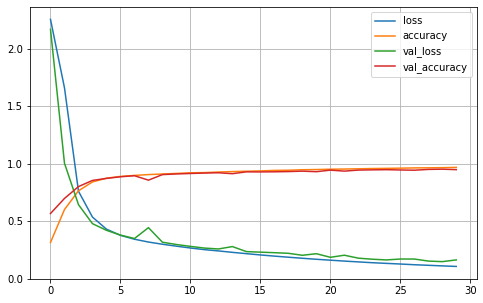

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize =(8,5))
plt.grid(True)